In [3]:
import os
import requests
import pdfplumber
#import PyPDF2
import codecs
import re
import pandas as pd
from openpyxl import load_workbook

In [4]:
file_path2 = r'C:\Users\Usuario\Python\Congreso\prueba.pdf'
file_path3 = r'C:\Users\Usuario\Python\Congreso\prueba2.pdf'
url = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/67A762BADC47F95C0525891A0079F6E2/$FILE/Asis_vot_OFICIAL_16-12-2022.pdf'
url2 = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/CFA2B36D7DA2CA4B052589CF0065E02F/$FILE/Asis_vot_PROVISIONAL_matinal_15-06-23.pdf'
url3 = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/E022225556671393052589D00018F64A/$FILE/Asis_vot_PROVISIONAL_vespertina_15-06-23.pdf'
url4 = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/49059385FAB28EB4052589CF0005F0DB/$FILE/Asis_vot_PROVISIONAL_14-06-23.pdf'
url5 = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/A365F5573AC36E3A052589D4008330C3/$FILE/Asis_vot_PROVISIONAL_20-06-23.pdf'
url6 = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/6F72AD54D9AF8D78052589D600021870/$FILE/Asis_vot_PROVISIONAL_vespertina_21-06-23.pdf'
url7 = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/C23FC6598CA1B3A6052589D50063EE9F/$FILE/Asis_vot_PROVISIONAL_matinal_21-06-23.pdf'
url8 = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/0EDB6892995786E8052589D700001301/$FILE/Asis_vot_PROVISIONAL_vespertina_22-06-2023.pdf'
url9 = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/46144AA2A086FF16052589D6006527A2/$FILE/Asis_vot_PROVISIONAL_matinal_22-06-2023.pdf'
ulr10 = 'https://www2.congreso.gob.pe/Sicr/RelatAgenda/PlenoComiPerm20112016.nsf/Apleno/5510AD6FC0ED582A05258CA7007DD8DB/$FILE/Asis_y_vot_de_la_sesi%C3%B3n_del_12-6-2025.pdf'

In [5]:
response = requests.get(ulr10)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    print(response.status_code)
else:
    print('Error al descargar el archivo PDF.')

200


In [ ]:
url = ulr10
path = os.getcwd()

# Verificar si la descarga fue exitosa
response = requests.get(url)
if response.status_code == 200:
    # Guardar el contenido del archivo descargado en una variable
    pdf_content = response.content
else:
    print('Error al descargar el archivo PDF.')
    
# Guardar el contenido del archivo en disco
file_name = url.split('/')[-1]
file_path = os.path.join(path, file_name)
print(file_path)

with open(file_path, 'wb') as file:
    file.write(pdf_content)
print('Archivo PDF guardado correctamente.')

file_name_txt0 = file_name.replace('.pdf','')
print(file_name_txt0)

c:\Users\jeanc\iCloudDrive\Python\Congreso\Asis_y_vot_de_la_sesi%C3%B3n_del_12-6-2025.pdf
Archivo PDF guardado correctamente.
Asis_y_vot_de_la_sesi%C3%B3n_del_12-6-2025


In [8]:
import requests
from pathlib import Path
import pdfplumber

def parse_pages(pages_str, max_page):
    """
    Convierte un string como "1,3-5" o "all" en una lista de índices 0-based.
    """
    if pages_str.strip().lower() == "all":
        return list(range(max_page))
    pages = set()
    for part in pages_str.split(','):
        part = part.strip()
        if '-' in part:
            start, end = map(int, part.split('-', 1))
            pages.update(range(start-1, min(end, max_page)))
        else:
            idx = int(part) - 1
            if 0 <= idx < max_page:
                pages.add(idx)
    return sorted(pages)

def extract_pdf_to_txt(pdf_path: Path, txt_path: Path, pages_to_extract):
    """
    Abre el PDF en pdf_path y vuelca el texto de pages_to_extract en txt_path.
    """
    with pdfplumber.open(pdf_path) as pdf, txt_path.open("w", encoding="utf-8") as out:
        for idx in pages_to_extract:
            text = pdf.pages[idx].extract_text() or ""
            out.write(f"--- Página {idx+1} ---\n")
            out.write(text + "\n\n")
    print(f"✔ Texto extraído en: {txt_path.name}")

if __name__ == "__main__":
    # 1. URL y directorio de trabajo
    url = ulr10
    work_dir = Path.cwd()
    
    # 2. Descarga y guardado del PDF
    resp = requests.get(url)
    resp.raise_for_status()  # detiene si hay error HTTP
    file_name = Path(url).name
    pdf_path = work_dir / file_name
    pdf_path.write_bytes(resp.content)
    print(f"PDF guardado en: {pdf_path.name}")
    
    # 3. Cálculo de páginas totales y petición al usuario
    with pdfplumber.open(pdf_path) as pdf:
        total = len(pdf.pages)
    print(f"El PDF tiene {total} páginas.")
    pages_str = input("Páginas a extraer (p.ej. 'all' o '1,3-5'): ")
    
    # 4. Parseo de la selección y extracción
    pages = parse_pages(pages_str, total)
    if not pages:
        print("No se seleccionó ninguna página válida. Saliendo.")
    else:
        txt_path = pdf_path.with_suffix(".txt")
        print(f"Extrayendo páginas: {', '.join(str(p+1) for p in pages)}")
        extract_pdf_to_txt(pdf_path, txt_path, pages)
        print("✅ ¡Proceso completado!")


PDF guardado en: Asis_y_vot_de_la_sesi%C3%B3n_del_12-6-2025.pdf
El PDF tiene 31 páginas.
Extrayendo páginas: 5, 6
✔ Texto extraído en: Asis_y_vot_de_la_sesi%C3%B3n_del_12-6-2025.txt
✅ ¡Proceso completado!


In [17]:
import pikepdf
from pathlib import Path

def unlock_pdf(src: Path, dest: Path, password: str = ""):
    """
    Abre un PDF encriptado y guarda una copia desencriptada.
    """
    with pikepdf.open(src, password=password) as pdf:
        pdf.save(dest)

if __name__ == "__main__":
    src = Path("Asis_y_vot_de_la_sesión_del_12-6-2025.pdf")
    unlocked = src.with_name(src.stem + "_unlocked.pdf")
    pwd = input("Contraseña del PDF (o deja vacío si es owner-password): ")

    # 1) Desbloquear
    unlock_pdf(src, unlocked, password=pwd)
    print(f"PDF desncriptado guardado en: {unlocked.name}")

    # 2) Extraer texto ya sin restricciones
    import pdfplumber
    txt_out = unlocked.with_suffix(".txt")
    with pdfplumber.open(unlocked) as pdf, txt_out.open("w", encoding="utf-8") as out:
        for i, page in enumerate(pdf.pages, 1):
            text = page.extract_text() or "[sin texto]"
            out.write(f"--- Página {i} ---\n{text}\n\n")
    print("✅ Extracción completada en:", txt_out.name)

PDF desncriptado guardado en: Asis_y_vot_de_la_sesión_del_12-6-2025_unlocked.pdf
✅ Extracción completada en: Asis_y_vot_de_la_sesión_del_12-6-2025_unlocked.txt


In [18]:
patron1 = "VOTACIÓN: Fecha: (\d{2}/\d{2}/\d{4}) Hora: (\d{2}:\d{2} [ap]m)"
path = os.getcwd()
# Leer el archivo PDF descargado
for file in os.listdir():
    if file.endswith('Asis_y_vot_de_la_sesión_del_12-6-2025_unlocked.pdf'):
        file_path_pdf = os.path.join(path, file)
        print(file_path_pdf)
        file_name_txt = file.replace('.pdf','')
        print(file_name_txt)
        with pdfplumber.open(file_path_pdf) as pdf:
            print(f"El PDF tiene {len(pdf.pages)} páginas.")
            with open(f"{file_name_txt}.txt", "w", encoding="utf-8") as file_txt:
                # Recorrer las páginas del PDF
                for page in pdf.pages:
                    # Extraer el texto de cada página
                    text = page.extract_text()
                    file_txt.write(text)
                    print(text)
                    # busca el patrón
                    matches = re.findall(patron1, text)
                    if matches:
                        print("Página:", page.page_number)
                        file_txt.write(f"Página: {page.page_number} ------------------------------------\n")
                        #file_txt.write(text)
                        file_txt.write("\n--------------------------------------------\n")
                        print("El resultado se ha guardado correctamente como .txt'.")

c:\Users\jeanc\iCloudDrive\Python\Congreso\Asis_y_vot_de_la_sesión_del_12-6-2025_unlocked.pdf
Asis_y_vot_de_la_sesión_del_12-6-2025_unlocked
El PDF tiene 1 páginas.



In [26]:
patron2 = r"(\w{2,3})\s(.*),\s(.*?)\s(.*?)(?:\s\+{3})"
patron3 = r"(\w+)\s(.*),\s(.*?)\s(.*?)(?:\s\+\+\+|$)"
patron10 = r"([A-Z]{2,3})\s([A-ZÁÉÍÓÚÑ\s]+),\s([A-ZÁÉÍÓÚÑ\s]+)\s((?:SI\s?\+{3}\+{0,2}|NO\s?-{3,}\s?|SinRes|aus|Abst\.))"



# Leer el archivo PDF descargado
with pdfplumber.open(file_path) as pdf:
    # Recorrer las páginas del PDF
    page = pdf.pages[1]
    #Extraer el texto de cada página
    text = page.extract_text()
    #print(text)
    resultados = re.findall(patron10, text)

#df = pd.DataFrame(resultados, columns=["Código", "Nombre", "Apellido", "Voto"])
#print(df)

for resultado in resultados:
    codigo = resultado[0]
    nombre_apellido = resultado[1] + " " + resultado[2]
    resultado = resultado[3]
    print("Código:", codigo)
    print("Nombre y apellido:", nombre_apellido)
    print("Resultado:", resultado)
    print()

Código: QUE
Nombre y apellido: PROPONE INHABILITAR POR CINCO AÑOS PARA EL EJERCICIO
DE LA FUNCIÓN PÚBLICA A LA EXFISCAL DE LA NACIÓN ZORAIDA ÁVALOS RIVERA
APP ACUÑA PERALTA MARÍA GRIMANEZA
Resultado: SinRes

Código: AP
Nombre y apellido: FLORES ANCACHI JORGE LUIS
Resultado: Abst.

Código: AP
Nombre y apellido: PAREDES FONSECA KAROL IVETT
Resultado: SI +++

Código: NA
Nombre y apellido: ACUÑA PERALTA SEGUNDO HÉCTOR
Resultado: NO --- 

Código: PL
Nombre y apellido: FLORES RAMÍREZ ALEX RANDU
Resultado: NO --- 

Código: BM
Nombre y apellido: PAREDES GONZALES ALEX ANTONIO
Resultado: aus

Código: ERO
Nombre y apellido: GUTIÉRREZ MARÍA ANTONIETA
Resultado: SI +++

Código: FP
Nombre y apellido: FLORES RUÍZ VÍCTOR SEFERINO
Resultado: SI +++

Código: JPP
Nombre y apellido: PAREDES PIQUÉ SUSEL ANA MARÍA
Resultado: SinRes

Código: FP
Nombre y apellido: AGUINAGA RECUENCO ALEJANDRO
Resultado: SI +++

Código: APP
Nombre y apellido: GARCÍA CORREA IDELSO MANUEL
Resultado: SI +++

Código: PL
Nombre y ap

In [92]:
import io
response = requests.get(url)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Leer el contenido del archivo PDF sin descargarlo
    with pdfplumber.open(io.BytesIO(response.content)) as pdf:
        # Recorrer las páginas del PDF
        for page in pdf.pages:
            # Extraer el texto de cada página
            text = page.extract_text()
            print(text)
else:
    print('Error al descargar el archivo PDF.')


In [53]:
import io
import re
response = requests.get(url7)
patron_asunto = r"Asunto:\s*([\s\S]*?)\s*APP ACUÑA"
patron_fecha = r'Fecha: (\d{2}/\d{2}/\d{4}) Hora: (\d{2}:\d{2} [ap]m)'
asuntos = []
paginas = []
fechas = []
horas = []

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Leer el contenido del archivo PDF sin descargarlo
    with pdfplumber.open(io.BytesIO(response.content)) as pdf:
        with open(f"{file_name_txt0}.txt", "w", encoding="utf-8") as file_txt:
            # Recorrer las páginas del PDF
            for page in pdf.pages:
                text = page.extract_text()
                #print(text)
                asunto = re.findall(patron_asunto, text)
                asunto_final = [a.replace('\n', ' ') for a in asunto]
                fecha_hora = re.findall(patron_fecha, text)
                fecha, hora = fecha_hora[0]
                if asunto_final:
                    asuntos.extend(asunto_final)
                    paginas.append(page.page_number)
                    fechas.append(fecha)
                    horas.append(hora)
                    print(asunto_final)
                    file_txt.write(f"Página: {page.page_number}\n{fecha} {hora}\n")
                    file_txt.write("\n".join(asunto_final))
                    file_txt.write("\n--------------------------------------------\n")
                    print("El resultado se ha guardado correctamente como .txt'.")
else:
    print('Error al descargar el archivo PDF.')

['RESOLUCIÓN LEGISLATIVA DEL CONGRESO DE LA REPÚBLICA QUE DELEGA EN LA COMISIÓN PERMANENTE LA FACULTAD DE LEGISLAR']
El resultado se ha guardado correctamente como .txt'.
['TEXTO SUSTITUTORIO DE LOS PROYECTOS DE LEY 2257, 2325, 2351, 2384, 2523 Y 3414,QUE PROPONEN MODIFICAR EL CÓDIGO PENAL, DECRETO LEGISLATIVO 635, A FIN DE INCREMENTAR LA PENA DEL DELITO DE RECEPTACIÓN E INCORPORAR CIRCUNSTANCIAS AGRAVANTES']
El resultado se ha guardado correctamente como .txt'.
['EXONERACIÓN DE LA SEGUNDA VOTACIÓN DEL TEXTO SUSTITUTORIO DE LOS PROYECTOS DE LEY 2257, 2325, 2351, 2384, 2523 Y 3414,QUE PROPONEN MODIFICAR EL CÓDIGO PENAL, DECRETO LEGISLATIVO 635, A FIN DE INCREMENTAR LA PENA DEL DELITO DE RECEPTACIÓN E INCORPORAR CIRCUNSTANCIAS AGRAVANTES']
El resultado se ha guardado correctamente como .txt'.
['PROYECTO DE LEY 5228, QUE PROPONE EL SANEAMIENTO DEL LÍMITE ENTRE LOS DEPARTAMENTOS DE ÁNCASH Y LA LIBERTAD EN CUATRO TRAMOS']
El resultado se ha guardado correctamente como .txt'.
['EXONERACIÓN D

In [80]:
with pdfplumber.open(file_path3) as pdf:
    # Acceder a la página deseada por su índice
    page = pdf.pages[0]

    # Extraer el texto de la página
    text = page.extract_text(encoding='utf-8')
    decoded_text = codecs.decode(text, 'unicode_escape')
    print(decoded_text)

In [79]:
with open(file_path1, 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)
    
    page = pdf_reader.pages(1)
    # Extraer el texto de cada página
    text = page.extract_text()
    print(text)

NameError: name 'file_path1' is not defined

In [71]:
# Abre el archivo PDF con PyPDF2
with open(file_path, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    
    # Obtiene el número de páginas del PDF
    num_pages = reader.pages
    print(len(num_pages))


3


In [48]:
asuntos[0]

'PROYECTO DE RESOLUCIÓN LEGISLATIVA DEL CONGRESO 5432, QUE PROPONE INHABILITAR POR CINCO AÑOS PARA EL EJERCICIO DE LA FUNCIÓN PÚBLICA A LA EXFISCAL DE LA NACIÓN ZORAIDA ÁVALOS RIVERA'

In [54]:
data = {'Asunto': asuntos, 'Pagina': paginas, 'Fecha': fechas, 'Hora': horas}
df = pd.DataFrame(data)

In [47]:
df.head()

Asunto  Pagina       Fecha  \
0  PROYECTO DE RESOLUCIÓN LEGISLATIVA DEL CONGRES...       2  21/06/2023   
1  PROYECTO DE RESOLUCIÓN LEGISLATIVA DEL CONGRES...       4  21/06/2023   
2  PROYECTO DE RESOLUCIÓN LEGISLATIVA DEL CONGRES...       6  21/06/2023   
3  PROYECTO DE RESOLUCIÓN LEGISLATIVA DEL CONGRES...       8  21/06/2023   
4  SEGUNDA VOTACIÓN DEL TEXTO SUSTITUTORIO DEL PR...      10  21/06/2023   

       Hora  
0  05:41 pm  
1  05:58 pm  
2  06:51 pm  
3  07:05 pm  
4  07:15 pm

In [70]:
df_excel = pd.read_excel('datos.xlsx', sheet_name='Sheet1')

# Concatenar los DataFrames existente y nuevo
df_final = pd.concat([df_excel, df], ignore_index=True)

In [71]:
df_final.shape, df_excel.shape, df.shape

((114, 4), (100, 4), (14, 4))

In [57]:
df_final.to_excel('datos.xlsx', index=False)

In [72]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Asunto  114 non-null    object
 1   Pagina  114 non-null    int64 
 2   Fecha   114 non-null    object
 3   Hora    114 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.7+ KB


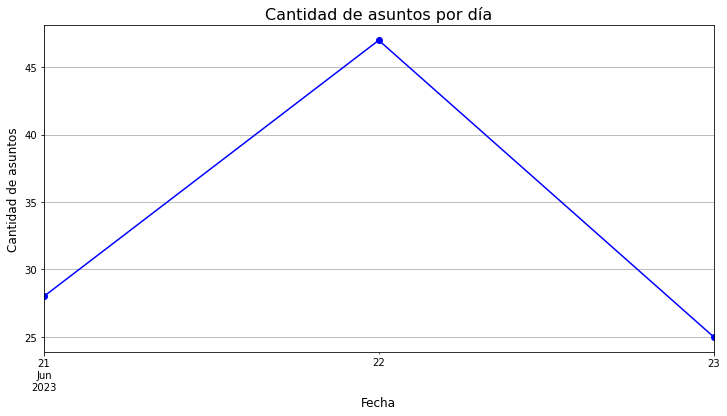

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

dfgraf = pd.read_excel('datos.xlsx', sheet_name='Sheet1')

# Primero, asegúrate de que la columna 'fecha' esté en formato de fecha
dfgraf['Fecha'] = pd.to_datetime(dfgraf['Fecha'], format='%d/%m/%Y')

# Agrupa los datos por día y cuenta la cantidad de asuntos por día
conteo_asuntos = dfgraf.groupby(dfgraf['Fecha'])['Asunto'].count()

# Crea el gráfico
plt.figure(figsize=(12, 6))
conteo_asuntos.plot(kind='line', marker='o', linestyle='-', color='blue')

# Personaliza el gráfico
plt.title('Cantidad de asuntos por día', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de asuntos', fontsize=12)
plt.grid(True)

# Muestra el gráfico
plt.show()
